In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def get_SF(ref, check_mask = False):
    ref_map = np.zeros((761,761))
    ref_map[:] = np.nan
    ismip_map = np.zeros((761,761))
    ismip_map[:] = np.nan
    
    for i in tqdm(range(ref.shape[1])):
        for j in range(ref.shape[2]):
            for k in range(ref.shape[0]):
                if check_mask:
                    if ~np.ma.is_masked(ref[k, i, j]):
                        ref_map[i,j] = ref[k, i, j]
                        ismip_map[i,j] = THETA[k, i, j]
                else:
                    if ~np.isnan(ref[k, i, j]):
                        ref_map[i,j] = ref[k, i, j]
                        ismip_map[i,j] = THETA[k, i, j]
                    
    return ref_map

In [3]:
cube = nc.Dataset('/data/SO2/SO24/ANDY/SOHI/Data/Obs_Climatology/ISMIP6/obs_temperature_1995-2017_8km_x_60m.nc')
THETA = cube['temperature'][:]
cube = nc.Dataset('/data/SO2/SO24/ANDY/SOHI/Data/Obs_Climatology/ISMIP6/obs_salinity_1995-2017_8km_x_60m.nc')
SALT = cube['salinity'][:]
RC = cube['z'][:]
X = cube['x'][:]/1e6
Y = cube['y'][:]/1e6

BED = nc.Dataset('/data/SO2/SO24/ANDY/SOHI/Data/Obs_Climatology/ISMIP6/bedmap2_8km.nc')
BED = BED['bed'][:]

In [4]:
BED_INDEX = np.zeros(BED.shape)

for i in tqdm(range(BED.shape[0])):
    for j in range(BED.shape[1]):
        if np.ma.is_masked(BED_INDEX[i,j]):
            BED_INDEX[i,j] = np.nan
        else:
            BED_INDEX[i,j] = np.argmin(abs(BED[i,j] - RC))

100%|██████████████████████████████████████████████████████| 761/761 [00:36<00:00, 20.69it/s]


In [5]:
interpT = nc.Dataset('/data/SO2/SO24/ANDY/SOHI/Data/Obs_Climatology/ISMIP6/obs_temperature_1995-2017_8km_x_60m.nc')
interpRC = interpT['z'][:]
interpT = interpT['temperature'][:]
interpS = nc.Dataset('/data/SO2/SO24/ANDY/SOHI/Data/Obs_Climatology/ISMIP6/obs_salinity_1995-2017_8km_x_60m.nc')
interpS = interpS['salinity'][:]


In [7]:
mask1 = np.load('SOHI_mask.npy')
mask2 = np.load('LLC_mask.npy')
mask3 = np.load('SOSE_mask.npy')
mask4 = np.load('ECCO_mask.npy')

ICESHELVES= np.load('maps/ICESHELVES.npy')
BATH = np.load('maps/SOHI_Bathymetry.npy')
BATH2 = -np.load('data/Resampled_Depth.npy')
BATH3 = np.load('maps/SOSE_Bathymetry.npy')
BATH3[BATH3==-5] = np.nan
BATH4 = np.load('maps/LLC90_Bathymetry.npy')

Ocean = mask1.copy()
Ocean[np.isnan(mask1)] = 2
Ocean[Ocean!=2] = np.nan

In [8]:
SOHI_T = np.load(f'maps/SOHI_T.npy')
SOHI_T = get_SF(SOHI_T)
SOHI_T[mask1!=1] = np.nan

interpT = get_SF(interpT, check_mask=True)
interpT = np.asarray(interpT)
interpT[mask1!=1] = np.nan

LLC_T = np.load(f'maps/LLC_T.npy')
LLC_T = get_SF(LLC_T)
LLC_T[mask2!=1] = np.nan

SOSE_T = np.load(f'maps/SOSE_T.npy')
SOSE_T = get_SF(SOSE_T)
SOSE_T[mask3!=1] = np.nan

ECCO_T = np.load(f'maps/ECCO_T.npy')
ECCO_T = get_SF(ECCO_T)
ECCO_T[mask4!=1] = np.nan

  0%|                                                                | 0/761 [00:00<?, ?it/s]/tmp/ipykernel_3740697/2655464738.py:17: UserWarning: Warning: converting a masked element to nan.
  ismip_map[i,j] = THETA[k, i, j]
  0%|                                                                | 0/761 [00:00<?, ?it/s]/tmp/ipykernel_3740697/2655464738.py:12: UserWarning: Warning: converting a masked element to nan.
  ref_map[i,j] = ref[k, i, j]
/tmp/ipykernel_3740697/2655464738.py:13: UserWarning: Warning: converting a masked element to nan.
  ismip_map[i,j] = THETA[k, i, j]
100%|██████████████████████████████████████████████████████| 761/761 [00:50<00:00, 15.01it/s]


In [9]:
BATH[np.isnan(SOHI_T)] = np.nan
BATH2[np.isnan(LLC_T)] = np.nan
interpT[np.isnan(SOHI_T)] = np.nan
BED[np.isnan(SOHI_T)] = np.nan

In [10]:
SOHI_S = np.load(f'maps/SOHI_S.npy')
SOHI_S = get_SF(SOHI_S)
SOHI_S[mask1!=1] = np.nan

interpS = get_SF(interpS, check_mask=True)
interpS = np.asarray(interpS)
interpS[mask1!=1] = np.nan

LLC_S = np.load(f'maps/LLC_S.npy')
LLC_S = get_SF(LLC_S)
LLC_S[mask2!=1] = np.nan

SOSE_S = np.load(f'maps/SOSE_S.npy')
SOSE_S = get_SF(SOSE_S)
SOSE_S[mask3!=1] = np.nan

ECCO_S = np.load(f'maps/ECCO_S.npy')
ECCO_S = get_SF(ECCO_S)
ECCO_S[mask4!=1] = np.nan

  0%|                                                                | 0/761 [00:00<?, ?it/s]/tmp/ipykernel_3740697/2655464738.py:17: UserWarning: Warning: converting a masked element to nan.
  ismip_map[i,j] = THETA[k, i, j]
  0%|                                                                | 0/761 [00:00<?, ?it/s]/tmp/ipykernel_3740697/2655464738.py:12: UserWarning: Warning: converting a masked element to nan.
  ref_map[i,j] = ref[k, i, j]
/tmp/ipykernel_3740697/2655464738.py:13: UserWarning: Warning: converting a masked element to nan.
  ismip_map[i,j] = THETA[k, i, j]
100%|██████████████████████████████████████████████████████| 761/761 [00:50<00:00, 14.98it/s]


# Regional Maps

In [11]:
main_mask = mask1.copy()
main_mask[ICESHELVES==1] = np.nan

In [12]:
ICESHELVES[np.isnan(ICESHELVES)] = 0

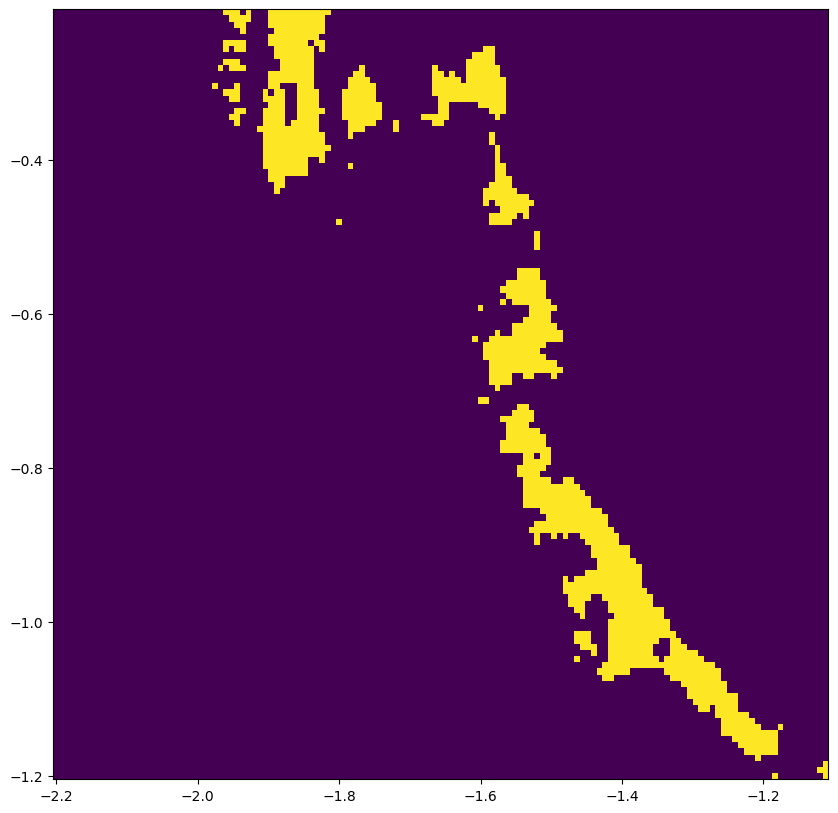

In [36]:
xlim = [-2.2, -1.1]
ylim = [-1.2, -0.2]

xlim = [np.argmin(abs(i  - X)) for i in xlim]
ylim = [np.argmin(abs(i  - X)) for i in ylim]

Xkm = np.asarray([8 for i in range(xlim[0], xlim[1])])
Xkm = np.cumsum(Xkm)
Ykm = np.asarray([8 for i in range(ylim[0], ylim[1])])
Ykm = np.cumsum(Ykm)

fig, ax = plt.subplots(figsize=(10,10))
ax.pcolormesh(X[xlim[0]:xlim[1]], Y[ylim[0]:ylim[1]], BED[ylim[0]:ylim[1],xlim[0]:xlim[1]], cmap='jet')
ax.pcolormesh(X[xlim[0]:xlim[1]], Y[ylim[0]:ylim[1]], ICESHELVES[ylim[0]:ylim[1],xlim[0]:xlim[1]])

In [37]:
sub1 = interpT[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(interpT[ylim[0]:ylim[1],xlim[0]:xlim[1]])
print(np.nanmean(interpT[ylim[0]:ylim[1],xlim[0]:xlim[1]]))

sub2 = SOHI_T * mask1
print(np.nanmean(sub2[ylim[0]:ylim[1],xlim[0]:xlim[1]]))
sub2 = sub2[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub2[ylim[0]:ylim[1],xlim[0]:xlim[1]])

sub3 = LLC_T * mask2
print(np.nanmean(sub3[ylim[0]:ylim[1],xlim[0]:xlim[1]]))
sub3 = sub3[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub3[ylim[0]:ylim[1],xlim[0]:xlim[1]])

sub4 = SOSE_T * mask3
sub4 = sub4[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub4[ylim[0]:ylim[1],xlim[0]:xlim[1]])

sub5 = ECCO_T * mask4
sub5 = sub5[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub5[ylim[0]:ylim[1],xlim[0]:xlim[1]])

0.16441028032406985
0.8814947980849599
0.4397029289857347


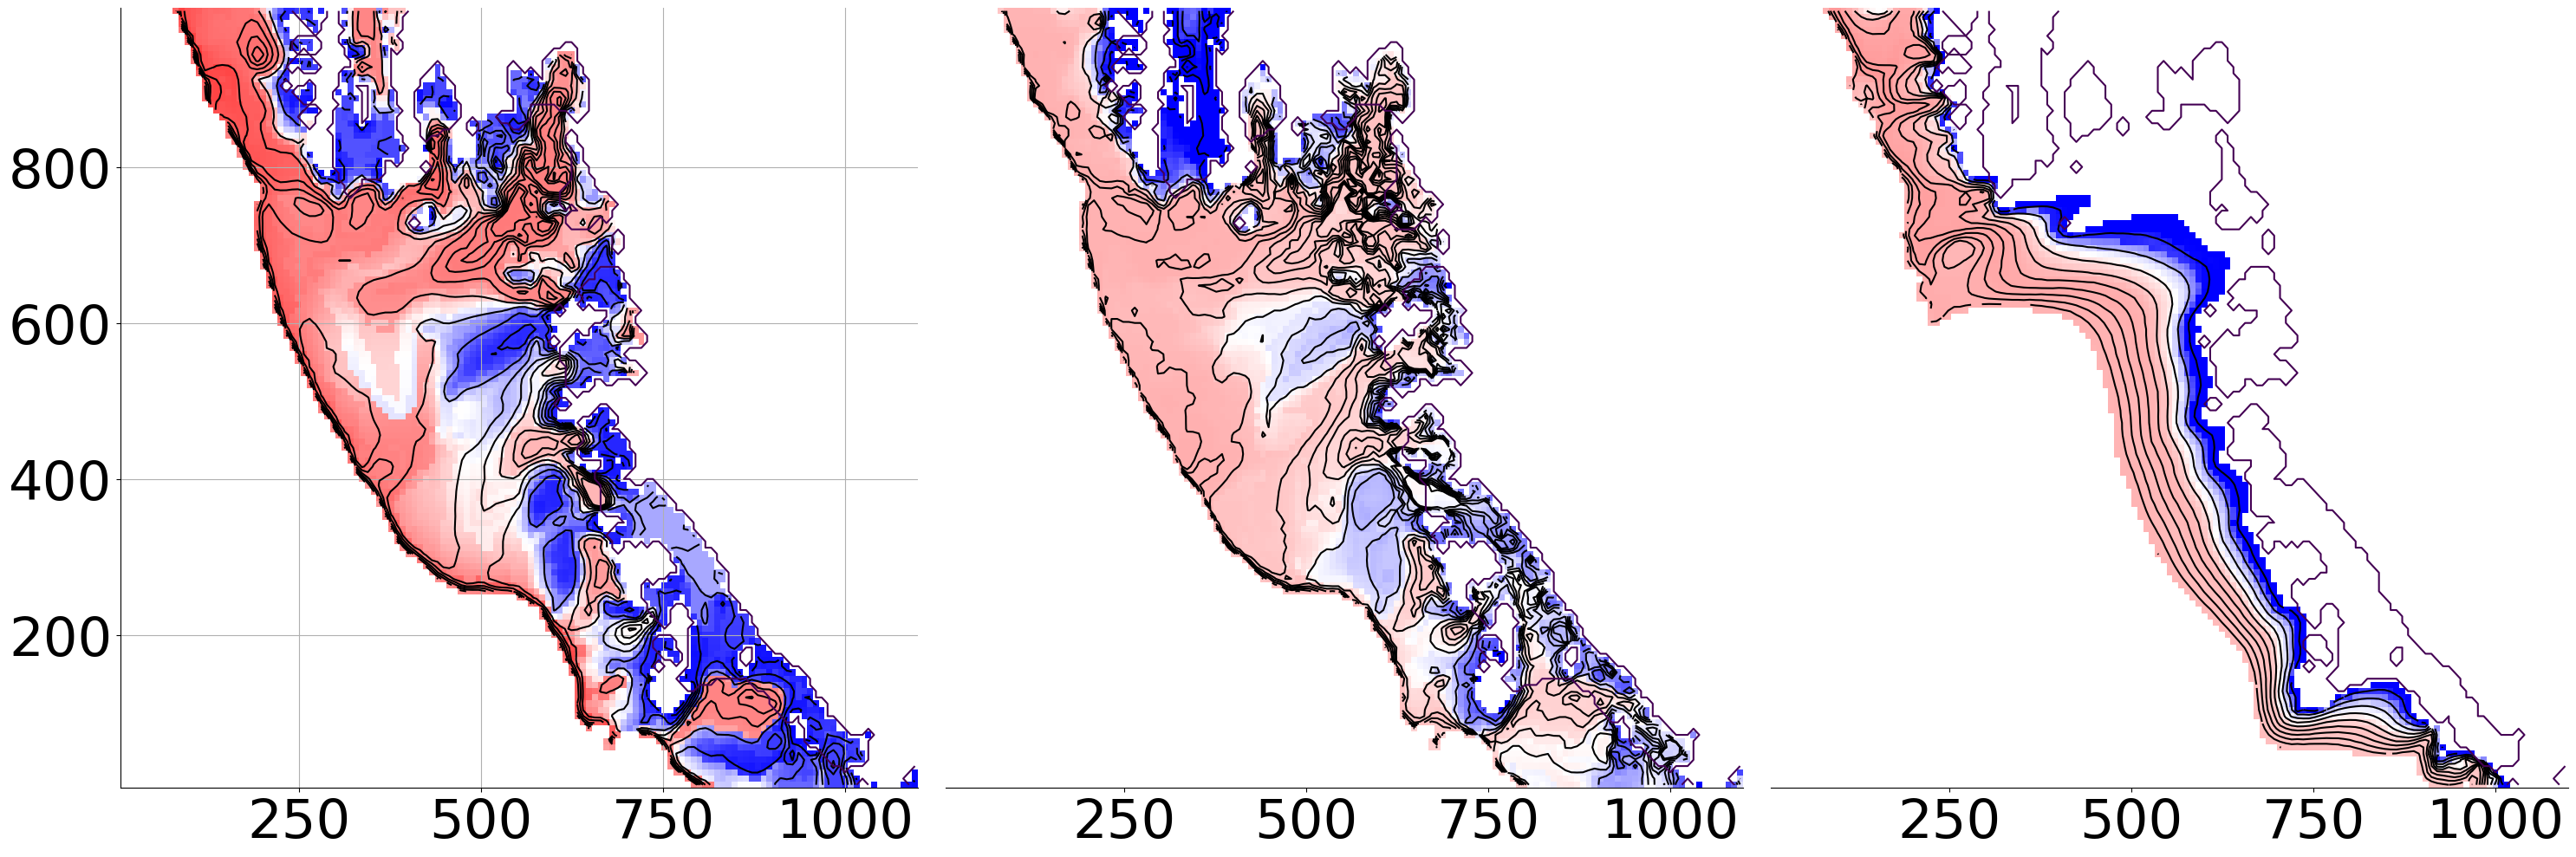

In [38]:
fig, ax = plt.subplots(figsize=(30,10), ncols=3)

ax[0].pcolormesh(Xkm, Ykm, sub1, vmin=-2, vmax=2, cmap='bwr')
ax[0].contour(Xkm, Ykm, BED[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask1[ylim[0]:ylim[1],xlim[0]:xlim[1]],
              levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])

ax[1].pcolormesh(Xkm, Ykm, sub2, vmin=-2, vmax=2, cmap='bwr')
ax[1].contour(Xkm, Ykm, BATH[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask1[ylim[0]:ylim[1],xlim[0]:xlim[1]],
              levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])

ax[2].pcolormesh(Xkm, Ykm, sub3, vmin=-2, vmax=2, cmap='bwr')
ax[2].contour(Xkm, Ykm, BATH2[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask2[ylim[0]:ylim[1],xlim[0]:xlim[1]],
              levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])

# ax[3].pcolormesh(Xkm, Ykm, sub4, vmin=-2, vmax=2, cmap='bwr')
# ax[3].contour(Xkm, Ykm, BATH3[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask[ylim[0]:ylim[1],xlim[0]:xlim[1]],
#               levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])


for a in ax.flat:
    a.contour(Xkm, Ykm, ICESHELVES[ylim[0]:ylim[1],xlim[0]:xlim[1]], levels=[0,1])
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.tick_params(axis='both', labelsize=45)
    
    a.set_xticks([250, 500, 750, 1000])
    
    
ax[0].set_yticks([200, 400, 600, 800])

ax[1].set_yticks([])
ax[2].set_yticks([])
# ax[3].set_yticks([])


ax[0].grid()

ax[1].spines['left'].set_visible(False)
ax[2].spines['left'].set_visible(False)
# ax[3].spines['left'].set_visible(False)
  
plt.tight_layout()

plt.savefig('img/Amundsen_v2.png', dpi=300)

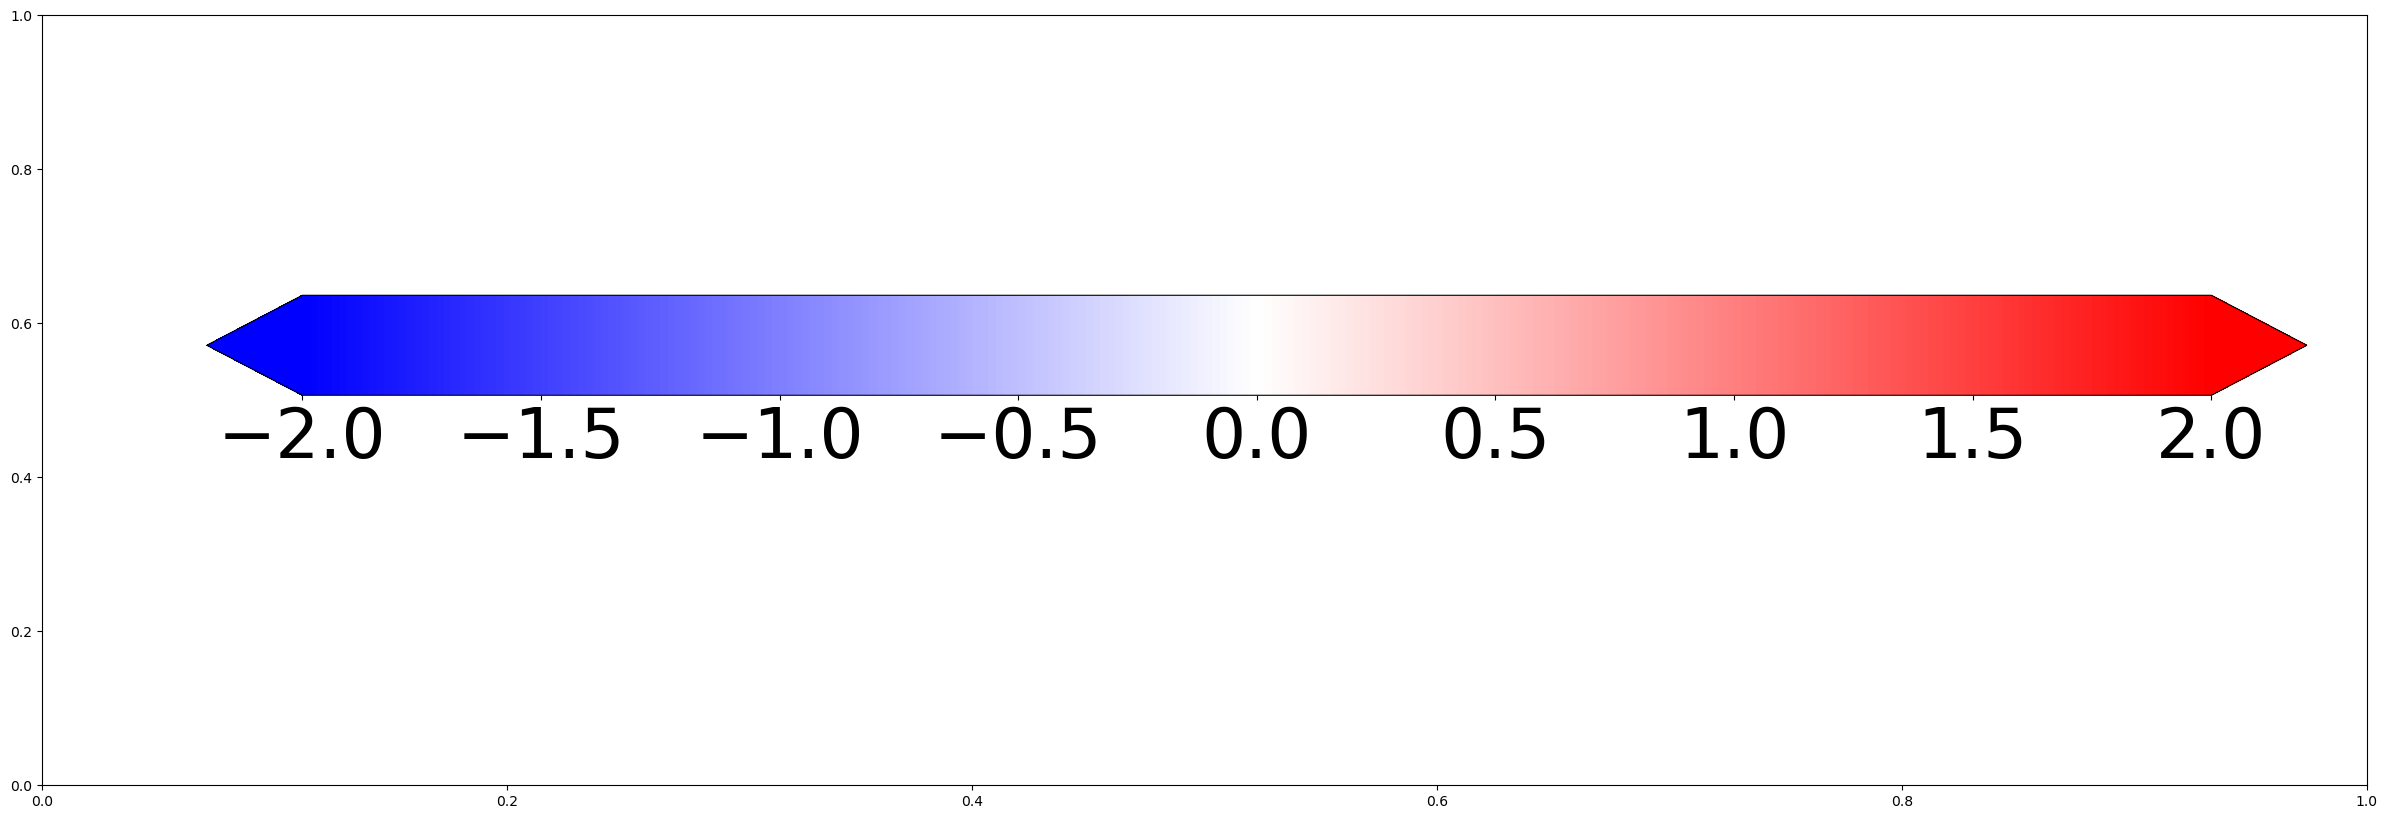

In [55]:
fig, ax = plt.subplots(figsize=(30,10))
cbar_ax = fig.add_axes([0.18, 0.5, 0.7, 0.1])
cbar = fig.colorbar(im, cax=cbar_ax,orientation='horizontal', extend='both')
cbar.ax.set_xlabel(f'', size=20)
cbar.ax.tick_params(labelsize=50)

plt.savefig('img/CBAR_Tamonaly.jpg', dpi=300)

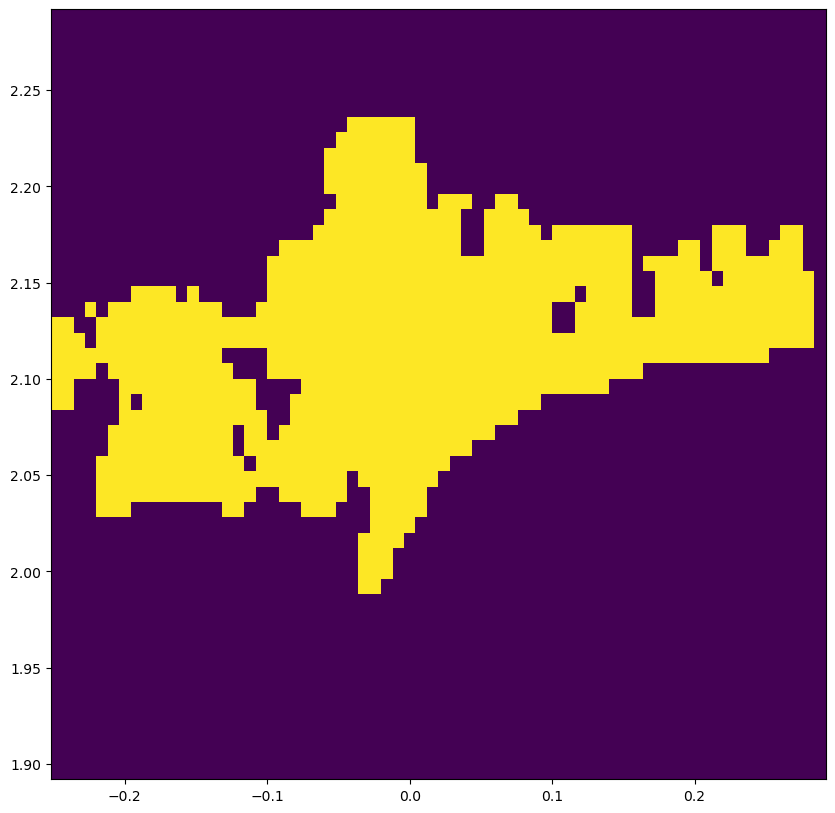

In [25]:
xlim = [-0.25, 0.3]
ylim = [1.9, 2.3]

xlim = [np.argmin(abs(i  - X)) for i in xlim]
ylim = [np.argmin(abs(i  - X)) for i in ylim]

Xkm = np.asarray([8 for i in range(xlim[0], xlim[1])])
Xkm = np.cumsum(Xkm)
Ykm = np.asarray([8 for i in range(ylim[0], ylim[1])])
Ykm = np.cumsum(Ykm)

fig, ax = plt.subplots(figsize=(10,10))
ax.pcolormesh(X[xlim[0]:xlim[1]], Y[ylim[0]:ylim[1]], BED[ylim[0]:ylim[1],xlim[0]:xlim[1]], cmap='jet')
ax.pcolormesh(X[xlim[0]:xlim[1]], Y[ylim[0]:ylim[1]], ICESHELVES[ylim[0]:ylim[1],xlim[0]:xlim[1]])

In [26]:
sub1 = interpT[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(interpT[ylim[0]:ylim[1],xlim[0]:xlim[1]])
print(np.nanmean(interpT[ylim[0]:ylim[1],xlim[0]:xlim[1]]))

sub2 = SOHI_T * mask1
print(np.nanmean(sub2[ylim[0]:ylim[1],xlim[0]:xlim[1]]))
sub2 = sub2[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub2[ylim[0]:ylim[1],xlim[0]:xlim[1]])

sub3 = LLC_T * mask2
print(np.nanmean(sub3[ylim[0]:ylim[1],xlim[0]:xlim[1]]))
sub3 = sub3[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub3[ylim[0]:ylim[1],xlim[0]:xlim[1]])

sub4 = SOSE_T * mask3
sub4 = sub4[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub4[ylim[0]:ylim[1],xlim[0]:xlim[1]])

sub5 = ECCO_T * mask4
sub5 = sub5[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub5[ylim[0]:ylim[1],xlim[0]:xlim[1]])

-1.3206793438447435
-1.2309327006965032
-1.4879012780195557


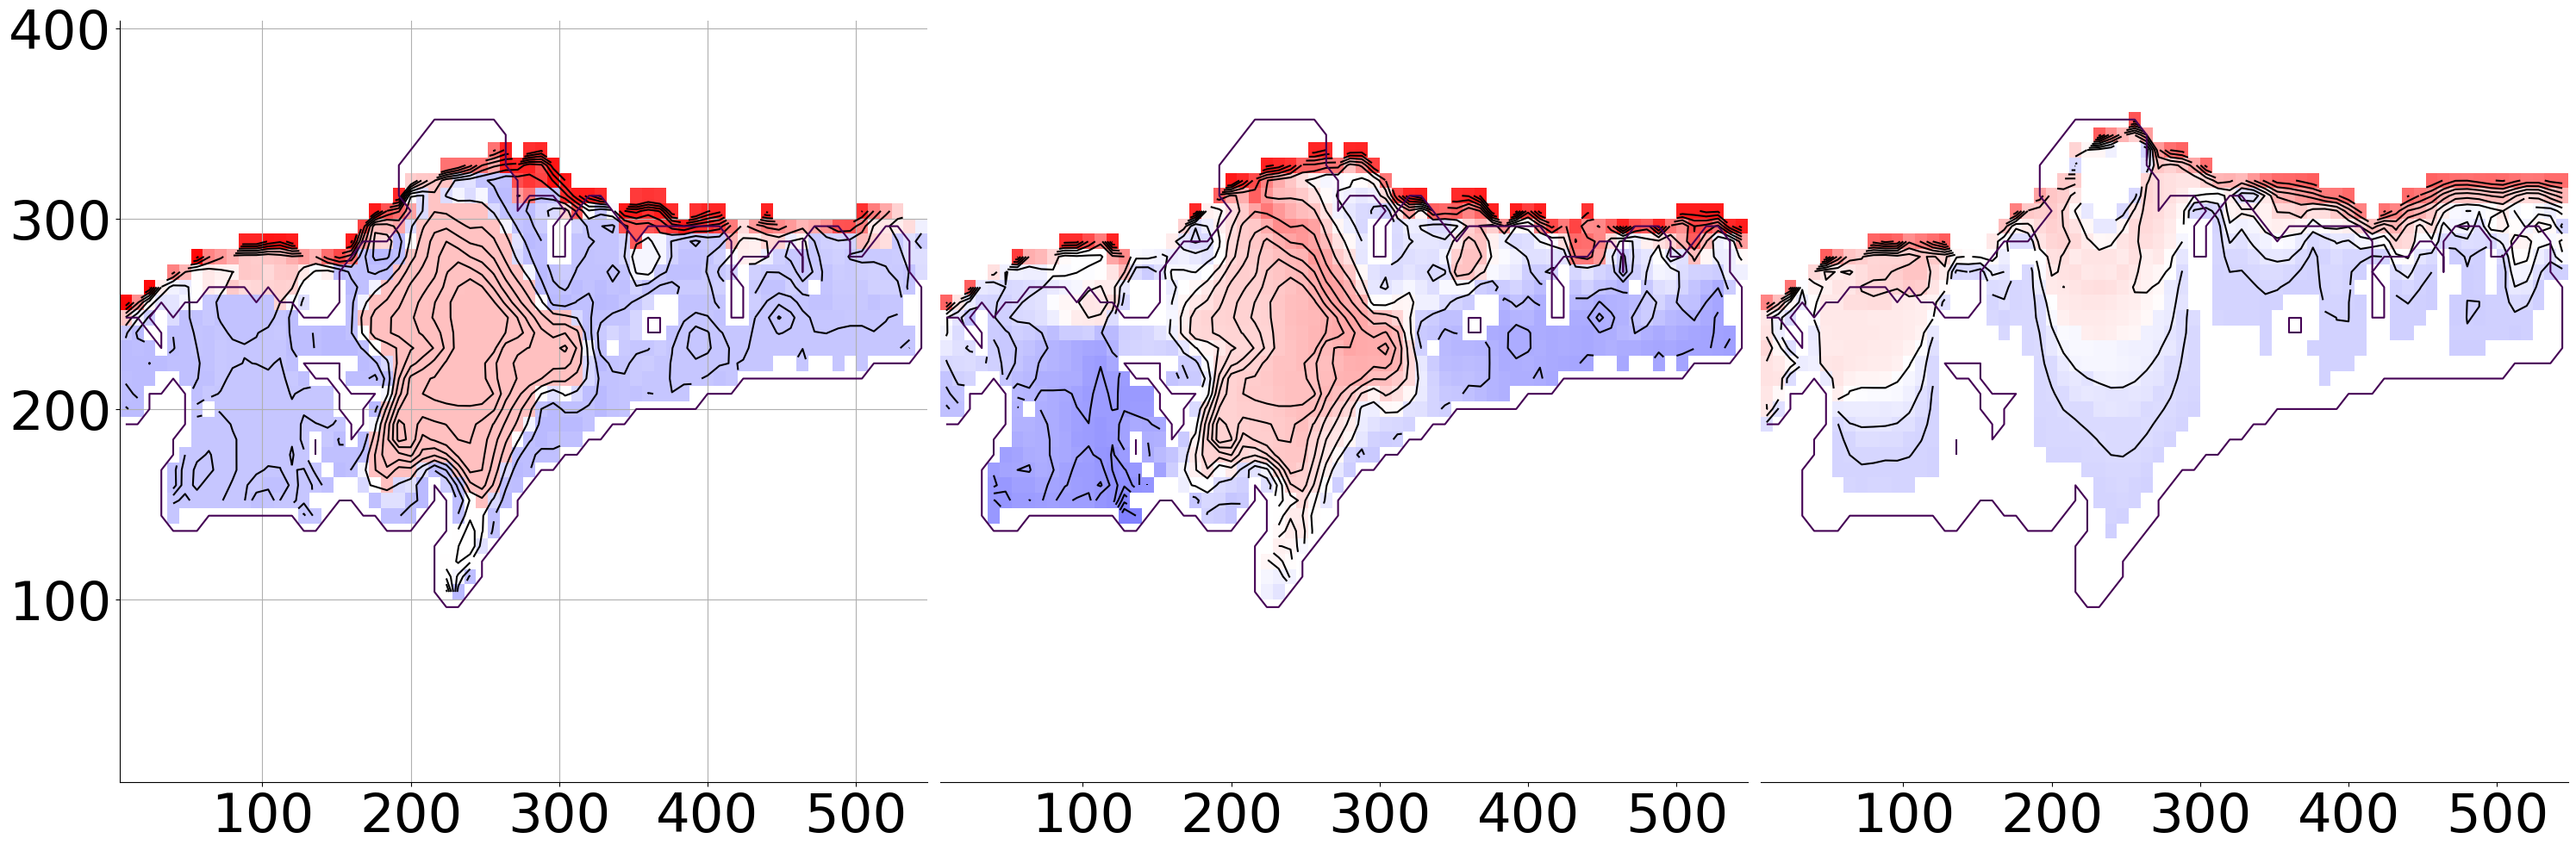

In [27]:
fig, ax = plt.subplots(figsize=(30,10), ncols=3)

ax[0].pcolormesh(Xkm, Ykm, sub1, vmin=-2, vmax=2, cmap='bwr')
ax[0].contour(Xkm, Ykm, BED[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask1[ylim[0]:ylim[1],xlim[0]:xlim[1]],
              levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])

ax[1].pcolormesh(Xkm, Ykm, sub2, vmin=-2, vmax=2, cmap='bwr')
ax[1].contour(Xkm, Ykm, BATH[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask1[ylim[0]:ylim[1],xlim[0]:xlim[1]],
              levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])

ax[2].pcolormesh(Xkm, Ykm, sub3, vmin=-2, vmax=2, cmap='bwr')
ax[2].contour(Xkm, Ykm, BATH2[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask2[ylim[0]:ylim[1],xlim[0]:xlim[1]],
              levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])

# ax[3].pcolormesh(Xkm, Ykm, sub4, vmin=-2, vmax=2, cmap='bwr')
# ax[3].contour(Xkm, Ykm, BATH3[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask[ylim[0]:ylim[1],xlim[0]:xlim[1]],
#               levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])


for a in ax.flat:
    a.contour(Xkm, Ykm, ICESHELVES[ylim[0]:ylim[1],xlim[0]:xlim[1]], levels=[0,1])
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.tick_params(axis='both', labelsize=45)
    
    a.set_xticks([100, 200, 300, 400, 500])
    
    
ax[0].set_yticks([100, 200, 300, 400])

ax[1].set_yticks([])
ax[2].set_yticks([])
# ax[3].set_yticks([])


ax[0].grid()

ax[1].spines['left'].set_visible(False)
ax[2].spines['left'].set_visible(False)
# ax[3].spines['left'].set_visible(False)
  
plt.tight_layout()

plt.savefig('img/Fimbul_v2.png', dpi=300)

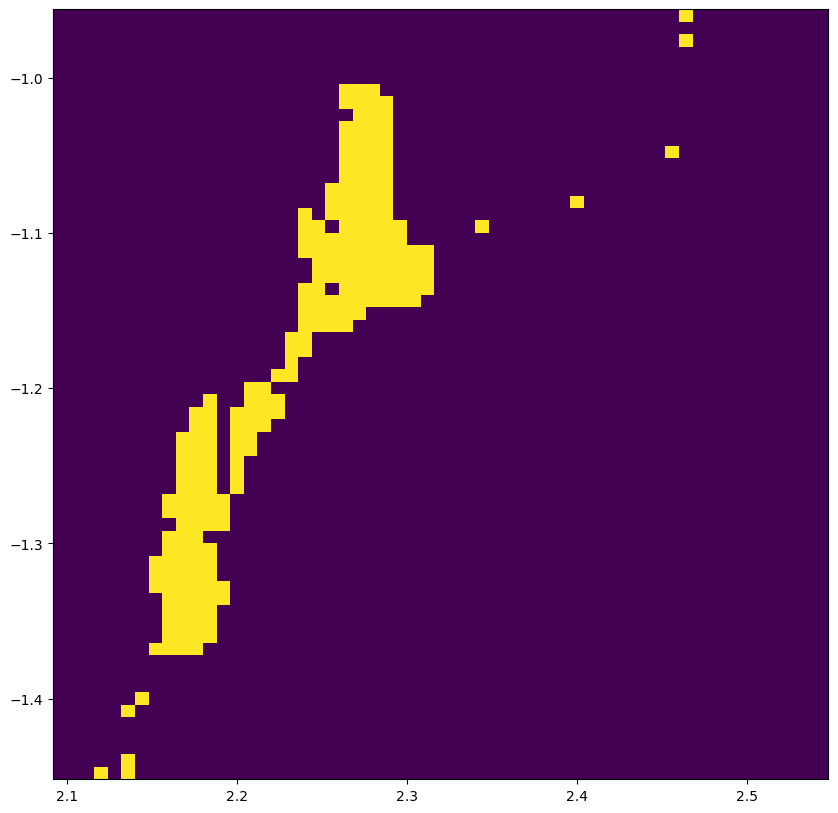

In [28]:
xlim = [2.1, 2.55]
ylim = [-1.45, -0.95]

xlim = [np.argmin(abs(i  - X)) for i in xlim]
ylim = [np.argmin(abs(i  - X)) for i in ylim]

Xkm = np.asarray([8 for i in range(xlim[0], xlim[1])])
Xkm = np.cumsum(Xkm)
Ykm = np.asarray([8 for i in range(ylim[0], ylim[1])])
Ykm = np.cumsum(Ykm)

fig, ax = plt.subplots(figsize=(10,10))
ax.pcolormesh(X[xlim[0]:xlim[1]], Y[ylim[0]:ylim[1]], BED[ylim[0]:ylim[1],xlim[0]:xlim[1]], cmap='jet')
ax.pcolormesh(X[xlim[0]:xlim[1]], Y[ylim[0]:ylim[1]], ICESHELVES[ylim[0]:ylim[1],xlim[0]:xlim[1]])

In [29]:
sub1 = interpT[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(interpT[ylim[0]:ylim[1],xlim[0]:xlim[1]])
print(np.nanmean(interpT[ylim[0]:ylim[1],xlim[0]:xlim[1]]))

sub2 = SOHI_T * mask1
print(np.nanmean(sub2[ylim[0]:ylim[1],xlim[0]:xlim[1]]))
sub2 = sub2[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub2[ylim[0]:ylim[1],xlim[0]:xlim[1]])

sub3 = LLC_T * mask2
print(np.nanmean(sub3[ylim[0]:ylim[1],xlim[0]:xlim[1]]))
sub3 = sub3[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub3[ylim[0]:ylim[1],xlim[0]:xlim[1]])

sub4 = SOSE_T * mask3
sub4 = sub4[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub4[ylim[0]:ylim[1],xlim[0]:xlim[1]])

sub5 = ECCO_T * mask4
sub5 = sub5[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub5[ylim[0]:ylim[1],xlim[0]:xlim[1]])

-0.6757767055613015
-0.6011500176197333
-0.7077959474466682


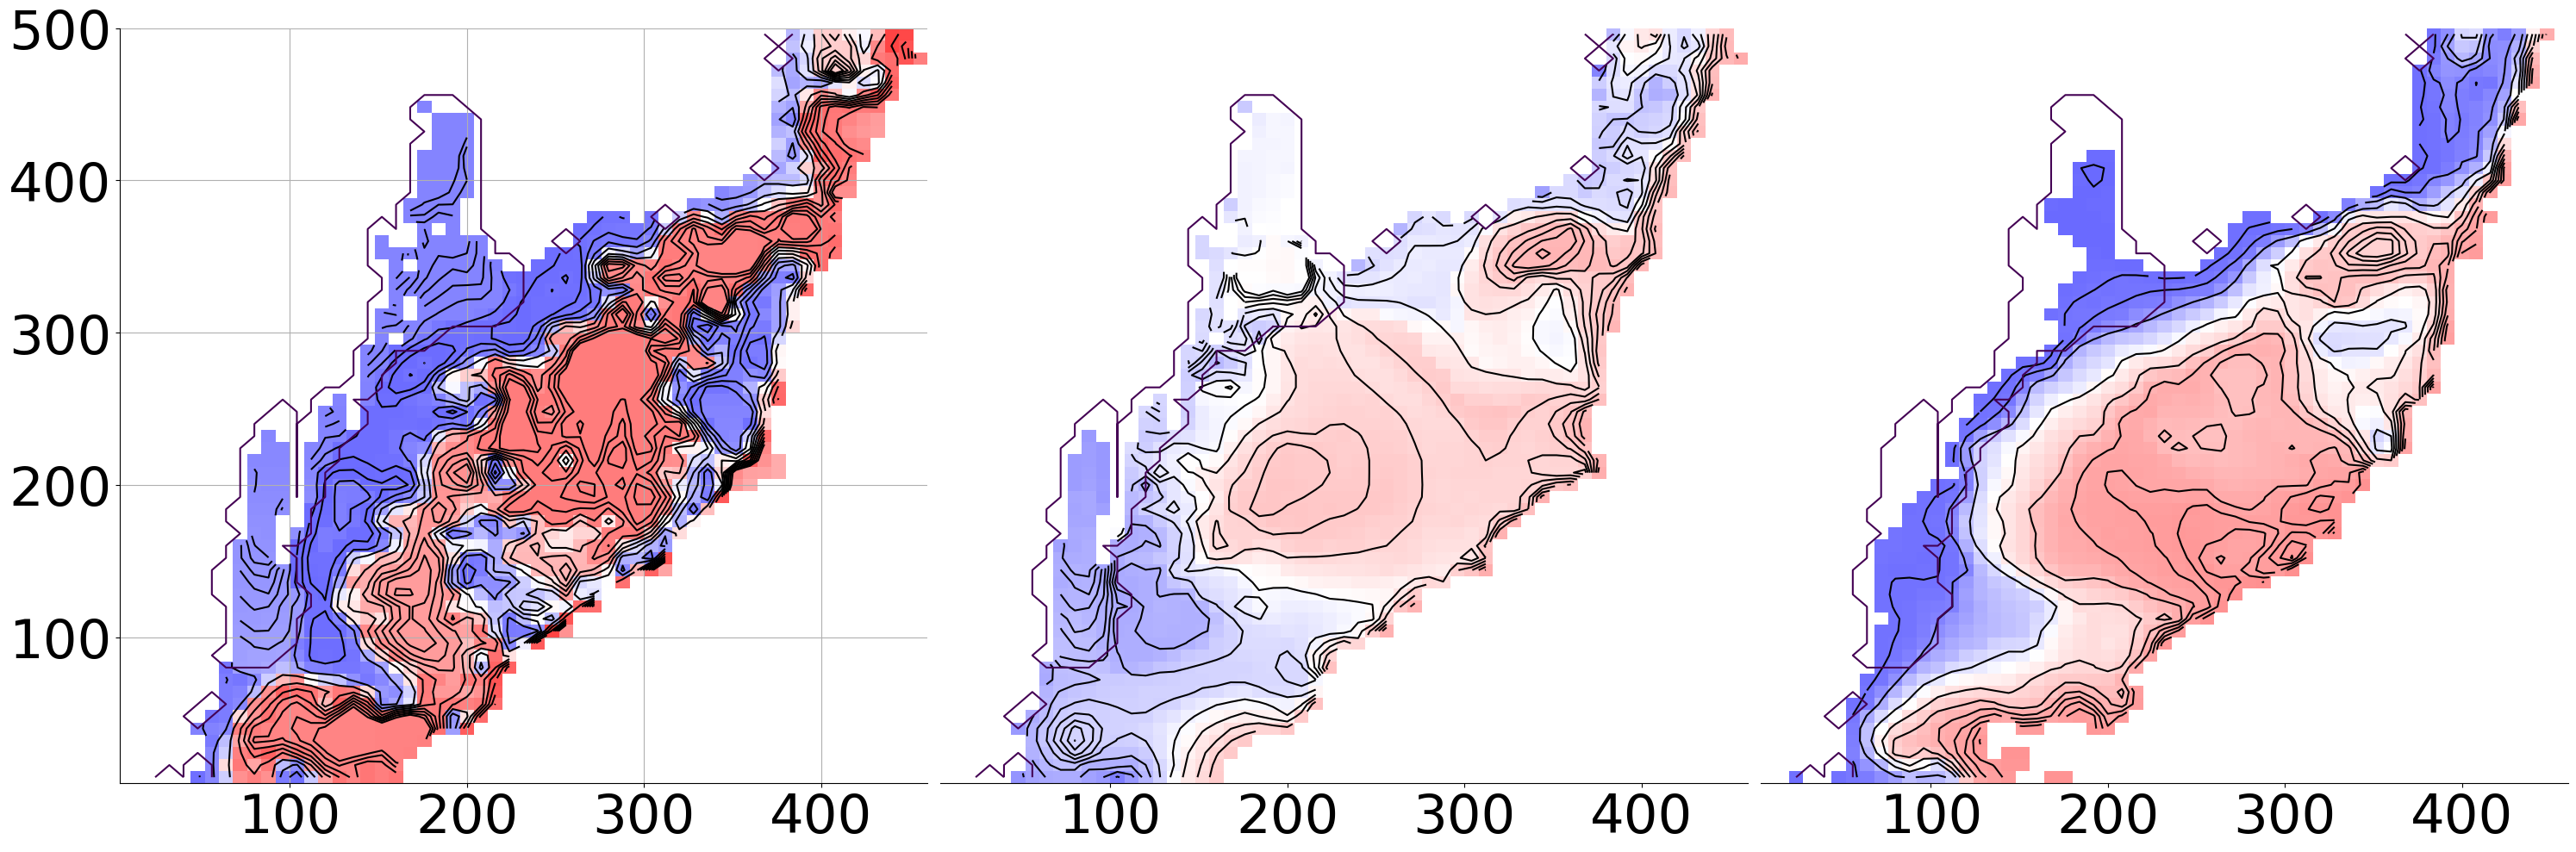

In [31]:
fig, ax = plt.subplots(figsize=(30,10), ncols=3)

ax[0].pcolormesh(Xkm, Ykm, sub1, vmin=-2, vmax=2, cmap='bwr')
ax[0].contour(Xkm, Ykm, BED[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask1[ylim[0]:ylim[1],xlim[0]:xlim[1]],
              levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])

ax[1].pcolormesh(Xkm, Ykm, sub2, vmin=-2, vmax=2, cmap='bwr')
ax[1].contour(Xkm, Ykm, BATH[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask1[ylim[0]:ylim[1],xlim[0]:xlim[1]],
              levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])

ax[2].pcolormesh(Xkm, Ykm, sub3, vmin=-2, vmax=2, cmap='bwr')
ax[2].contour(Xkm, Ykm, BATH2[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask2[ylim[0]:ylim[1],xlim[0]:xlim[1]],
              levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])

# ax[3].pcolormesh(Xkm, Ykm, sub4, vmin=-2, vmax=2, cmap='bwr')
# ax[3].contour(Xkm, Ykm, BATH3[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask[ylim[0]:ylim[1],xlim[0]:xlim[1]],
#               levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])


for a in ax.flat:
    a.contour(Xkm, Ykm, ICESHELVES[ylim[0]:ylim[1],xlim[0]:xlim[1]], levels=[0,1])
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.tick_params(axis='both', labelsize=45)
    
    a.set_xticks([100, 200, 300, 400])
    
    
ax[0].set_yticks([100, 200, 300, 400, 500])

ax[1].set_yticks([])
ax[2].set_yticks([])
# ax[3].set_yticks([])


ax[0].grid()

ax[1].spines['left'].set_visible(False)
ax[2].spines['left'].set_visible(False)
# ax[3].spines['left'].set_visible(False)
  
plt.tight_layout()

plt.savefig('img/Totten_v2.png', dpi=300)

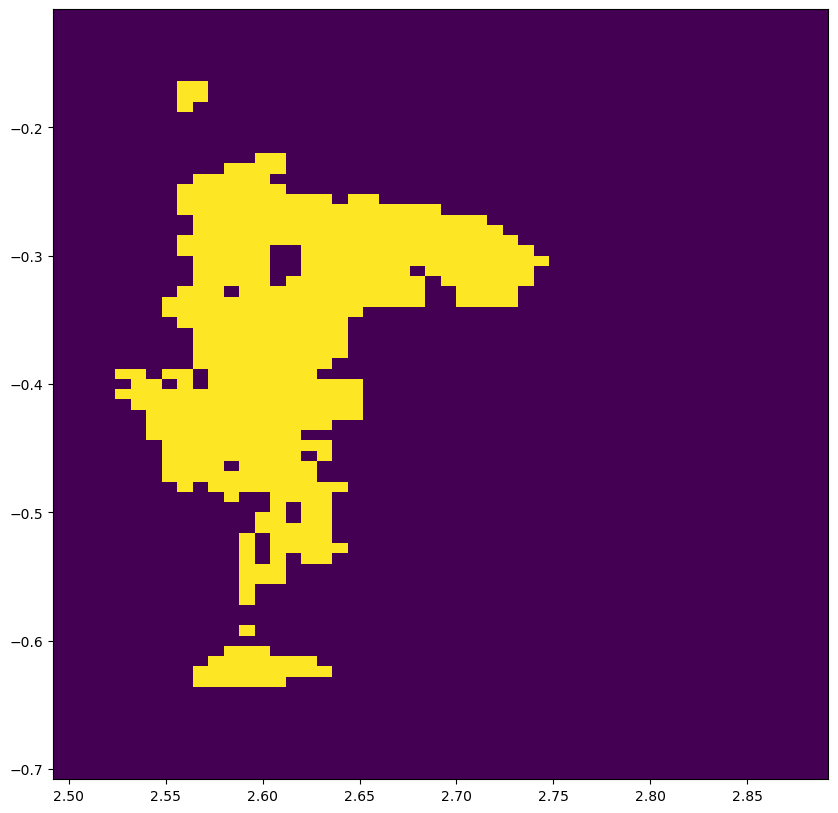

In [32]:
xlim = [2.5, 2.9]
ylim = [-0.7, -0.1]

xlim = [np.argmin(abs(i  - X)) for i in xlim]
ylim = [np.argmin(abs(i  - X)) for i in ylim]

Xkm = np.asarray([8 for i in range(xlim[0], xlim[1])])
Xkm = np.cumsum(Xkm)
Ykm = np.asarray([8 for i in range(ylim[0], ylim[1])])
Ykm = np.cumsum(Ykm)

fig, ax = plt.subplots(figsize=(10,10))
ax.pcolormesh(X[xlim[0]:xlim[1]], Y[ylim[0]:ylim[1]], BED[ylim[0]:ylim[1],xlim[0]:xlim[1]], cmap='jet')
ax.pcolormesh(X[xlim[0]:xlim[1]], Y[ylim[0]:ylim[1]], ICESHELVES[ylim[0]:ylim[1],xlim[0]:xlim[1]])

In [33]:
sub1 = interpT[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(interpT[ylim[0]:ylim[1],xlim[0]:xlim[1]])
print(np.nanmean(interpT[ylim[0]:ylim[1],xlim[0]:xlim[1]]))

sub2 = SOHI_T * mask1
print(np.nanmean(sub2[ylim[0]:ylim[1],xlim[0]:xlim[1]]))
sub2 = sub2[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub2[ylim[0]:ylim[1],xlim[0]:xlim[1]])

sub3 = LLC_T * mask2
print(np.nanmean(sub3[ylim[0]:ylim[1],xlim[0]:xlim[1]]))
sub3 = sub3[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub3[ylim[0]:ylim[1],xlim[0]:xlim[1]])

sub4 = SOSE_T * mask3
sub4 = sub4[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub4[ylim[0]:ylim[1],xlim[0]:xlim[1]])

sub5 = ECCO_T * mask4
sub5 = sub5[ylim[0]:ylim[1],xlim[0]:xlim[1]] - np.nanmean(sub5[ylim[0]:ylim[1],xlim[0]:xlim[1]])

-1.386340576220607
-0.6951590131940811
-1.197889554152707


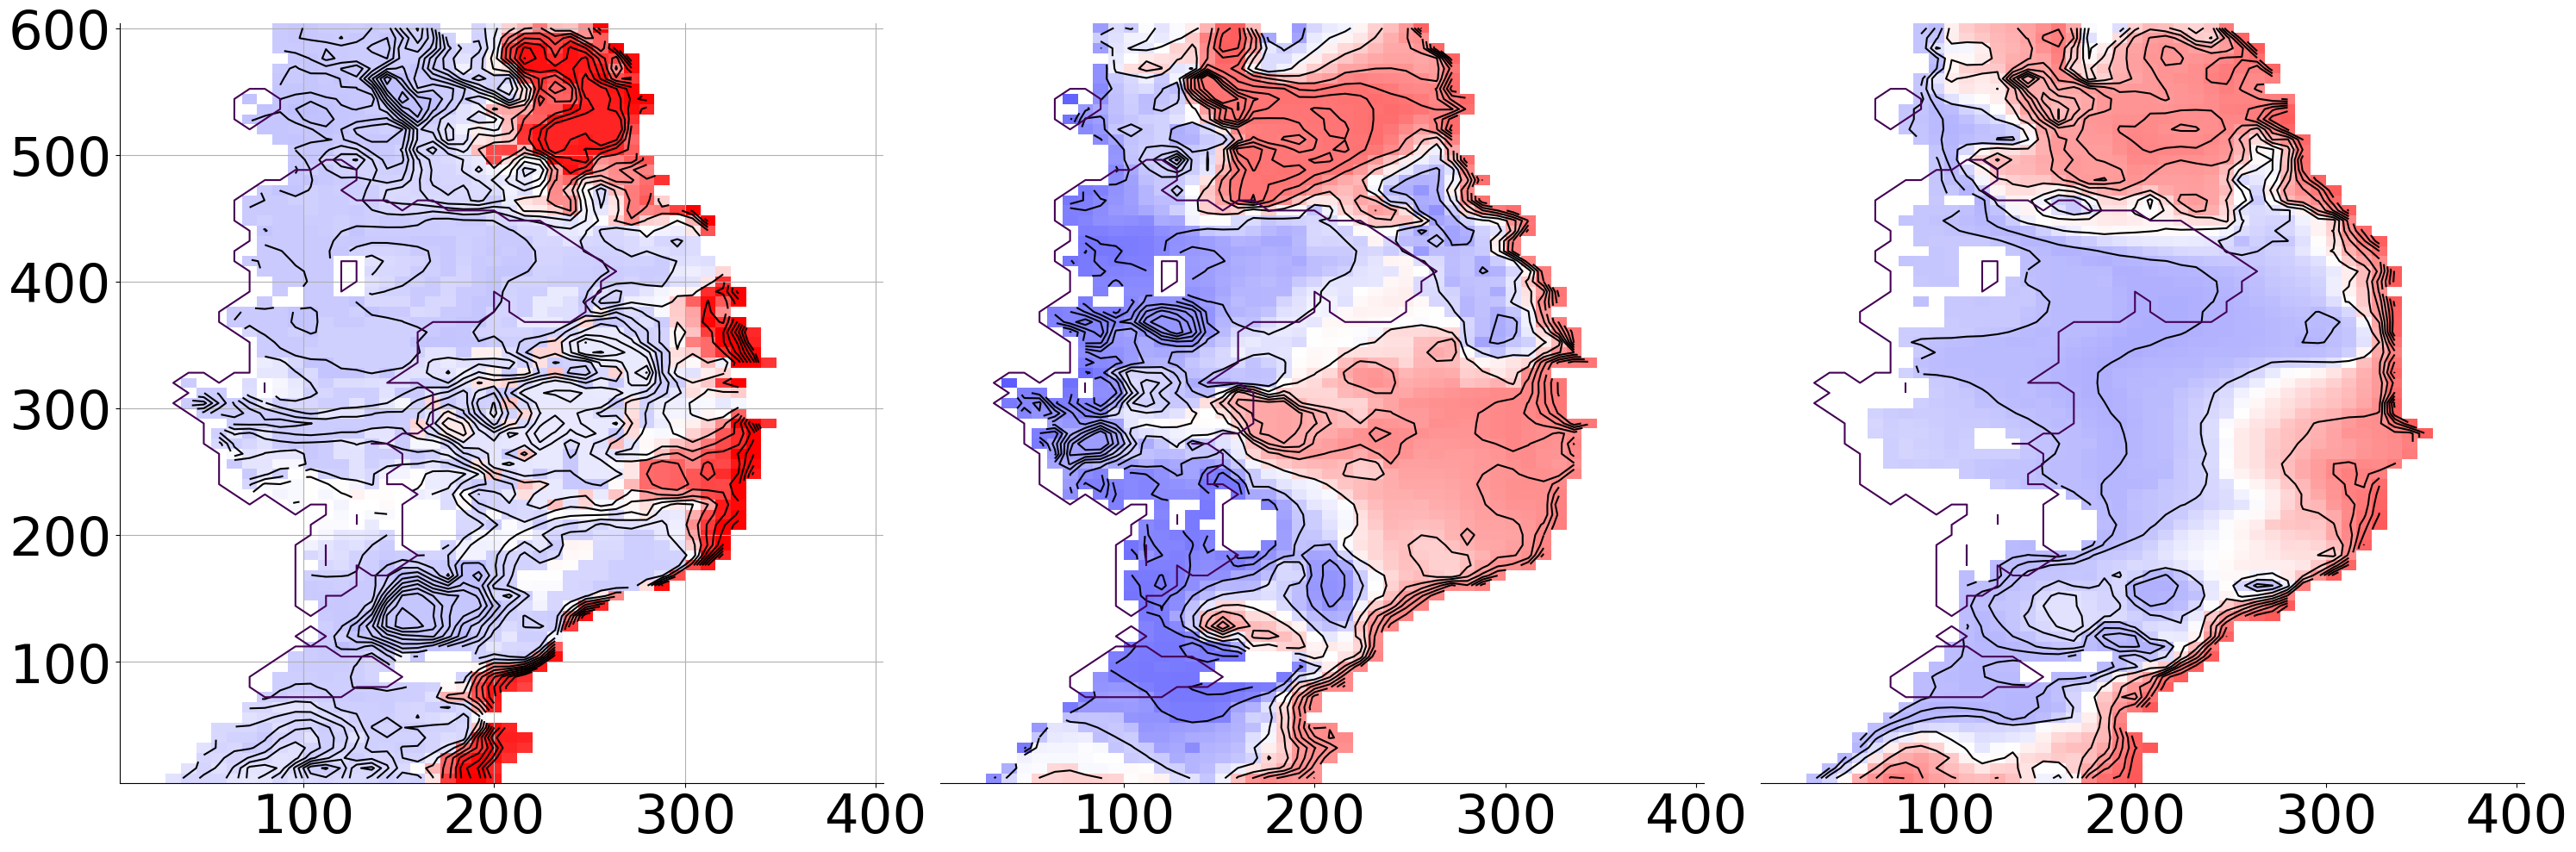

In [35]:
fig, ax = plt.subplots(figsize=(30,10), ncols=3)

ax[0].pcolormesh(Xkm, Ykm, sub1, vmin=-2, vmax=2, cmap='bwr')
ax[0].contour(Xkm, Ykm, BED[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask1[ylim[0]:ylim[1],xlim[0]:xlim[1]],
              levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])

ax[1].pcolormesh(Xkm, Ykm, sub2, vmin=-2, vmax=2, cmap='bwr')
ax[1].contour(Xkm, Ykm, BATH[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask1[ylim[0]:ylim[1],xlim[0]:xlim[1]],
              levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])

ax[2].pcolormesh(Xkm, Ykm, sub3, vmin=-2, vmax=2, cmap='bwr')
ax[2].contour(Xkm, Ykm, BATH2[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask2[ylim[0]:ylim[1],xlim[0]:xlim[1]],
              levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])

# ax[3].pcolormesh(Xkm, Ykm, sub4, vmin=-2, vmax=2, cmap='bwr')
# ax[3].contour(Xkm, Ykm, BATH3[ylim[0]:ylim[1],xlim[0]:xlim[1]] * mask[ylim[0]:ylim[1],xlim[0]:xlim[1]],
#               levels=np.arange(-1000, 1, 100), colors=['k'], linestyles=['solid'])


for a in ax.flat:
    a.contour(Xkm, Ykm, ICESHELVES[ylim[0]:ylim[1],xlim[0]:xlim[1]], levels=[0,1])
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.tick_params(axis='both', labelsize=45)
    
    a.set_xticks([100, 200, 300, 400])
    
    
ax[0].set_yticks([100, 200, 300, 400, 500, 600])

ax[1].set_yticks([])
ax[2].set_yticks([])
# ax[3].set_yticks([])


ax[0].grid()

ax[1].spines['left'].set_visible(False)
ax[2].spines['left'].set_visible(False)
# ax[3].spines['left'].set_visible(False)
  
plt.tight_layout()

    
    
    
plt.tight_layout()

plt.savefig('img/Shackleton_v2.png', dpi=300)